In [1]:
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline
import numpy as np
from datetime import date
plt.style.use('seaborn')

In [2]:
#Reading the CSV
dataset = pd.read_csv('globalterrorismdb.csv', encoding = "ISO-8859-1", sep=',', low_memory=False)
#Creating new dataframe to change de type of variable
df = pd.DataFrame({'year': dataset['iyear'],
                       'month': dataset['imonth'],
                       'day': dataset['iday']})
dataset[['day', 'month', 'year']] = df
#Filtring data only after 2000's 
dataset = dataset[dataset['year'] >= 2000]

# First Analysis

In [3]:
dfPWep = dataset['weapsubtype1_txt'].value_counts();

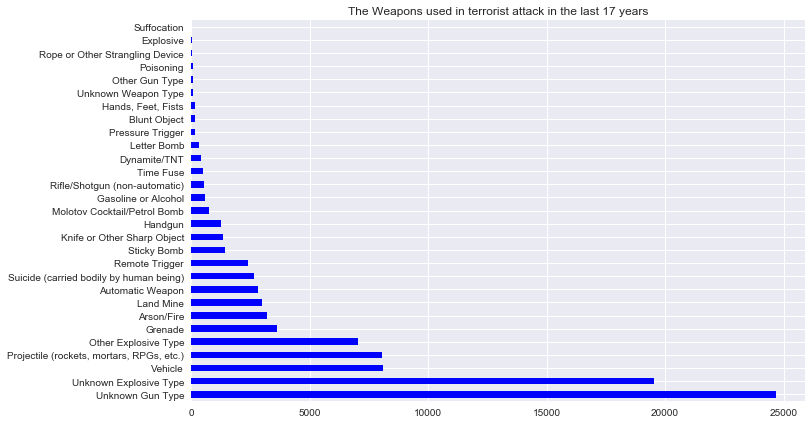

In [4]:
dfPWep.plot(kind='barh',figsize=(11,7), color='blue', title="The Weapons used in terrorist attack in the last 17 years");

First analysis is the list of the weapost most used in the terrorist attack in the last 17 years. How you can see, the most weapons used there's no knowlegde about that. 

In [5]:
dfYeWe = dataset[['iyear','weapsubtype1_txt']]
dfYeWe = pd.DataFrame(dfYeWe)

In [6]:
group01 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Unknown Explosive Type')]
group02 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Unknown Gun Type')]
group03 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Vehicle')]
group04 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Projectile (rockets, mortars, RPGs, etc.)')]
group05 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Other Explosive Type')]
group06 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Handgun')]
group07 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Grenade')]
group08 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Land Mine')]
group09 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Arson/Fire')]
group00 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Suicide (carried bodily by human being)')]
gpk01 = group01.groupby(['iyear']).size()
gpk02 = group02.groupby(['iyear']).size()
gpk03 = group03.groupby(['iyear']).size()
gpk04 = group04.groupby(['iyear']).size()
gpk05 = group05.groupby(['iyear']).size()
gpk06 = group06.groupby(['iyear']).size()
gpk07 = group07.groupby(['iyear']).size()
gpk08 = group08.groupby(['iyear']).size()
gpk09 = group09.groupby(['iyear']).size()
gpk00 = group00.groupby(['iyear']).size()

   

In [7]:
# Creating new series to the new Data Frame 
newDfGr = {
    'Unknown Explosive Type' : gpk01,
    'Unknown Gun Type' : gpk02,
    'Vehicle' : gpk03,
    'Projectile (rockets, mortars, RPGs, etc.)': gpk04,
    'Other Explosive Type': gpk05,
    'Handgun': gpk06,
    'Grenade': gpk07,
    'Land Mine': gpk08,
    'Arson/Fire': gpk09,
    'Suicide (carried bodily by human being)': gpk00
    
}
dfWepYear = pd.DataFrame(newDfGr)

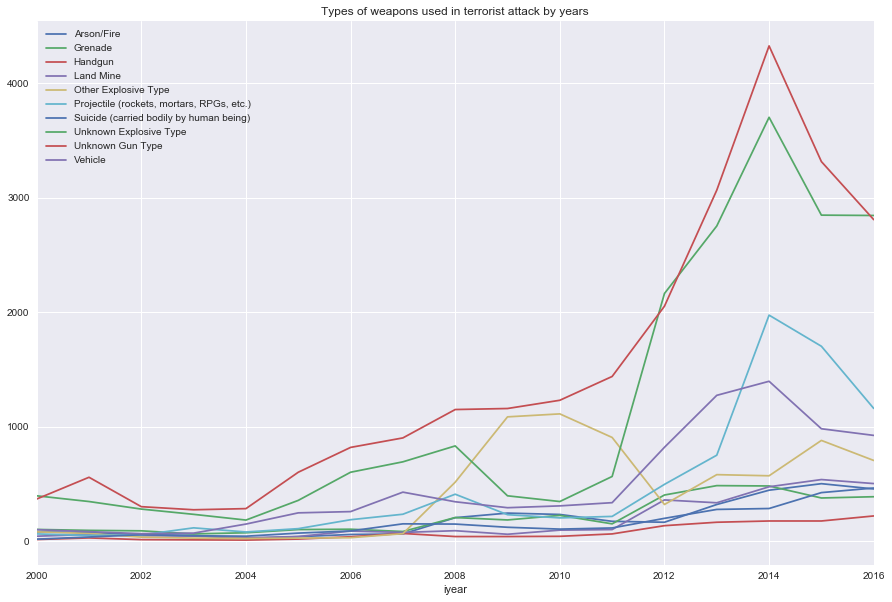

In [8]:
dfWepYear.plot(figsize=(15,10), title="Types of weapons used in terrorist attack by years");

That is the same information but using other view. Using that graphic you can see the 10 most weapons used during the years and how their conduct. 

In [32]:
#Creatin new dataset with some data
datasetkill = dataset[['year','country_txt', 'nkill', 'nwound']]

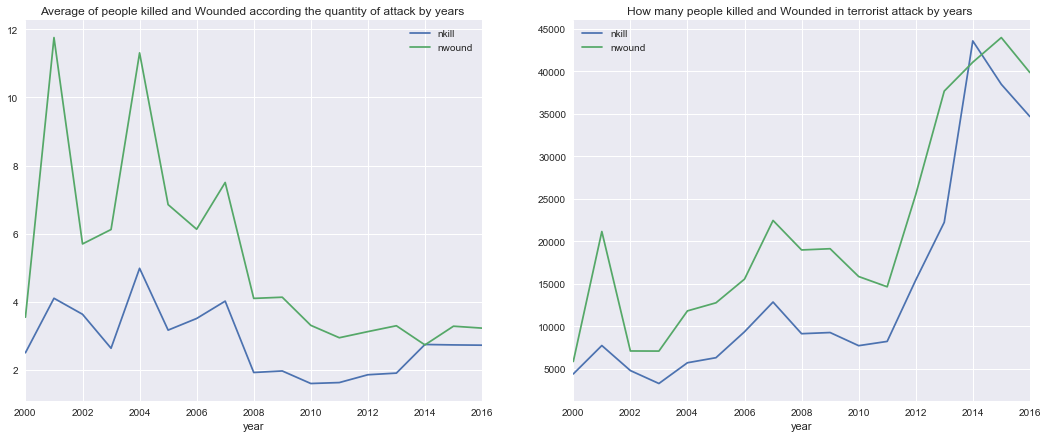

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(18,7))
datasetkill.groupby(datasetkill.year).mean().plot(ax = ax[0], title= "Average of people killed and Wounded according " 
                                                  "the quantity of attack by years ");


datasetkill.groupby([datasetkill.year]).sum().plot(ax = ax[1], title= "How many people killed and Wounded " 
                                                  "in terrorist attack by years ");


In [101]:
datasetkillnew = datasetkill.set_index('year')

In [102]:
datasetkillnew = datasetkill[['year', 'nkill']]
datasetwoundnew = datasetkill[['year', 'nwound']]
dtkn = datasetkillnew.groupby('year').size();
dtwm = datasetwoundnew.groupby('year').size();

In [103]:
newDfGrKw = {
    'Killed' : dtkn,
    'Wound' : dtwm
    
}
dfKillWou = pd.DataFrame(newDfGrKw)

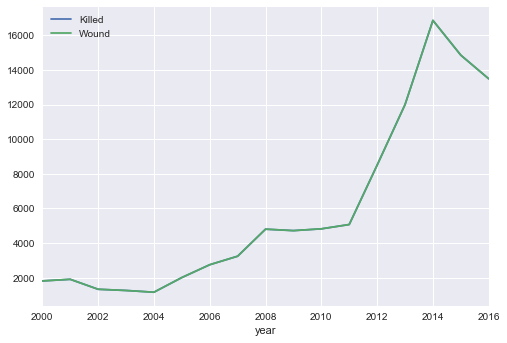

In [104]:
dfKillWou.plot();

In [105]:
dtg = dataset.groupby(['country_txt','year']).size()

In [106]:
dtgroupcountry  = pd.DataFrame(dtg)

In [107]:
dtgroupcountrypivoted = dtgroupcountry.pivot_table(columns='country_txt', index='year')

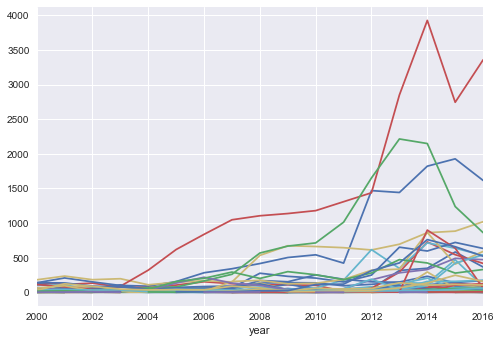

In [108]:
dtgroupcountrypivoted.plot(legend=False);

In [113]:
dtgroupcountrypivoted.shape

(17, 166)

In [114]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver="full").fit_transform(dtgroupcountrypivoted)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Days of the month when happens the terrorist attack

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,7))
dataset.groupby(['day']).size().plot(ax = ax[0], title= 'Analysis of terrorist attacks by day');
dataset.groupby(['month']).size().plot(ax = ax[1], title = 'Analysis of terrorist attacks by month');

In [ ]:
dtGrouAtt = dataset.groupby(['year', 'attacktype1_txt']).size()

In [ ]:
dtGrouAtt

In [ ]:
dtGrouAtt = pd.DataFrame(dtGrouAtt, index=None)

In [ ]:
dtGrouAtt.set_index('year')

In [ ]:
dtGrouAtt = dtGrouAtt.pivot_table(columns='attacktype1_txt', index='year')

In [ ]:
dtGrouAtt.plot(kind='bar');

In [ ]:
dtGrouAtt